In [177]:
import pandas as pd
train_df = pd.read_csv("C:/Users/user/datasets/umojahack-africa-2022-intermediate-challenge/train.csv")
test_df = pd.read_csv("C:/Users/user/datasets/umojahack-africa-2022-intermediate-challenge/test.csv")
train_df.head()

,claim_id,policy_number,claim_number,sum_insured,product,agent,class_of_business,risk_type,loss_date,client_type,renewal_frequency,primary_cause,secondary_cause,branch,target
0,ID_JZ7QWRHH57RO,pol000009680,claim0011359,300000.0,prod00027,ag00068,cob00031,rt00006,2021-05-13,ct0003,rf0001,pc0007,sc00022,br00006,82150.00
1,ID_KQ5TJMVLJ4EP,pol000006869,claim0005272,16000.0,prod00005,ag00226,cob00010,rt00032,2018-05-13,ct0003,rf0001,pc0007,sc00023,br00002,3780.24
2,ID_NYHI7WJGGIAE,pol000006135,claim0004147,3000.0,prod00029,ag00037,cob00010,rt00026,2018-08-18,ct0003,rf0001,pc0007,sc00024,br00002,2196.50
3,ID_ROMMDCXYUXN5,pol000008991,claim0009962,6000.0,prod00005,ag00037,cob00009,rt00032,2018-12-20,ct0003,rf0001,pc0007,sc00021,br00001,105.67
4,ID_2OTD9NX8L73D,pol000007768,claim0007346,26850.0,prod00015,ag00226,cob00034,rt00023,2018-11-07,ct0001,rf0001,pc0007,sc00021,br00001,1605.64


In [178]:
test_df.head()

,claim_id,policy_number,claim_number,sum_insured,product,agent,class_of_business,risk_type,loss_date,client_type,renewal_frequency,primary_cause,secondary_cause,branch
0,ID_4RO0KZI9BBW2,pol000007115,claim0005757,300000.0,prod00005,ag00068,cob00009,rt00032,2021-03-11,ct0003,rf0001,pc0007,sc00029,br00004
1,ID_GTE9ZUJ9GZ97,pol000006008,claim0003037,2700000.0,prod00015,ag00064,cob00034,rt00023,2020-06-25,ct0001,rf0003,pc0007,sc00022,br00002
2,ID_RUVIYRKWZ4RG,pol000007651,claim0006507,4071352.0,prod00012,ag00021,cob00016,rt00015,2019-03-14,ct0001,rf0001,pc0011,sc00049,br00001
3,ID_J81X8SWU6JYN,pol000010981,claim0013636,0.0,prod00002,ag00037,cob00002,rt00002,2018-12-04,ct0001,rf0002,pc0002,sc00012,br00005
4,ID_94NM3JJAWWOQ,pol000005926,claim0001750,1607178.0,prod00015,ag00037,cob00034,rt00023,2019-09-18,ct0001,rf0003,pc0007,sc00022,br00002


In [179]:
policies_df = pd.read_csv("C:/Users/user/datasets/umojahack-africa-2022-intermediate-challenge/policies.csv")
policies_df.head()

,policy_number,product_code,trans_date,from_date,to_date,agent,class_of_business,client_type,renewal_frequency,branch
0,pol000006995,prod00033,2017-07-01 08:24:55.800,2017-07-01 00:00:00.000,2018-07-01 00:00:00.000,ag00005,cob00035,ct0001,rf0002,br00002
1,pol000009828,prod00005,2017-07-01 09:04:02.217,2017-07-03 00:00:00.000,2017-11-02 00:00:00.000,ag00226,cob00009,ct0003,rf0001,br00006
2,pol000009828,prod00005,2017-07-01 09:04:02.217,2017-07-03 00:00:00.000,2017-11-02 00:00:00.000,ag00226,cob00031,ct0003,rf0001,br00006
3,pol000007729,prod00005,2017-07-01 09:36:53.843,2017-07-01 00:00:00.000,2017-10-31 00:00:00.000,ag00005,cob00031,ct0003,rf0001,br00002
4,pol000007729,prod00005,2017-07-01 09:36:53.843,2017-07-01 00:00:00.000,2017-10-31 00:00:00.000,ag00005,cob00009,ct0003,rf0001,br00002


In [180]:
sample_df = pd.read_csv("C:/Users/user/datasets/umojahack-africa-2022-intermediate-challenge/SampleSubmission.csv")
sample_df.head()

,claim_id,target
0,ID_4RO0KZI9BBW2,0
1,ID_GTE9ZUJ9GZ97,0
2,ID_RUVIYRKWZ4RG,0
3,ID_J81X8SWU6JYN,0
4,ID_94NM3JJAWWOQ,0


In [181]:
# Let us check for missing values 
train_df.isnull().sum().any(), test_df.isnull().sum().any(), policies_df.isnull().sum().any()

(True, True, True)

,Total,Percent
policy_number,86,0.009172
claim_id,0,0.000000
claim_number,0,0.000000
sum_insured,0,0.000000
product,0,0.000000


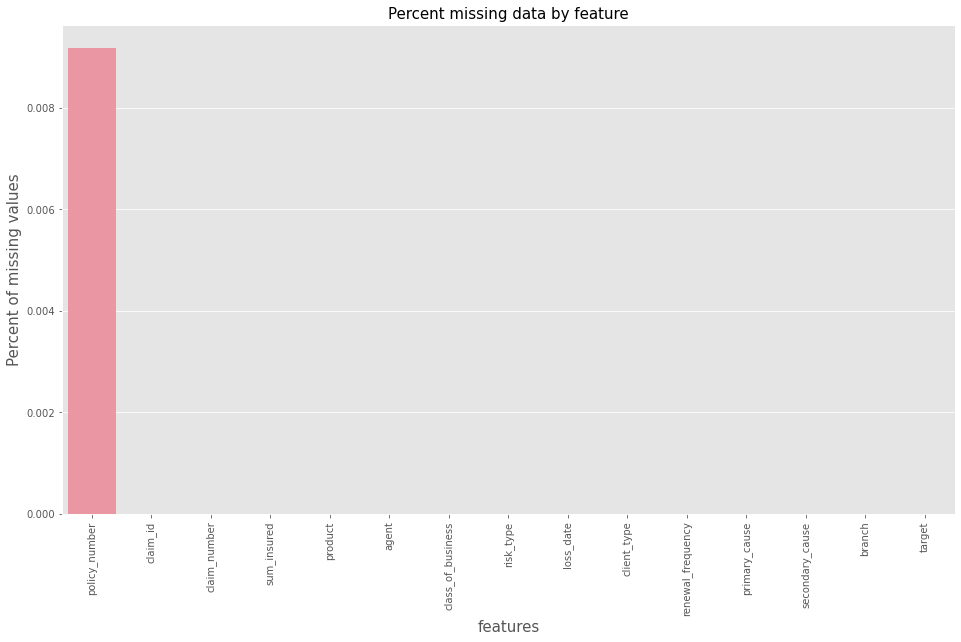

In [182]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
# We can go ahead to plot NaN Values
# We'll start with train dataset
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(16, 9))
plt.xticks(rotation='90')
sns.barplot(x=missing.index, y=missing['Percent'])
plt.xlabel('features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing.head()

,Total,Percent
policy_number,41,0.010202
claim_id,0,0.000000
claim_number,0,0.000000
sum_insured,0,0.000000
product,0,0.000000


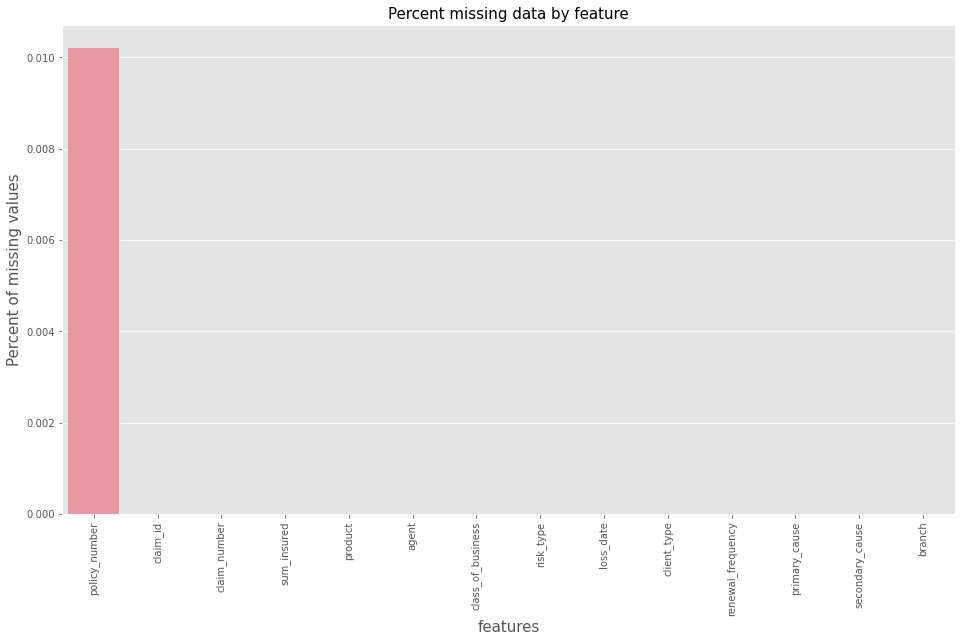

In [183]:
# Let's check for the test dataset
total = test_df.isnull().sum().sort_values(ascending=False)
percent = (test_df.isnull().sum()/test_df.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(16, 9))
plt.xticks(rotation='90')
sns.barplot(x=missing.index, y=missing['Percent'])
plt.xlabel('features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing.head()

,Total,Percent
class_of_business,46,0.001515
policy_number,0,0.000000
product_code,0,0.000000
trans_date,0,0.000000
from_date,0,0.000000


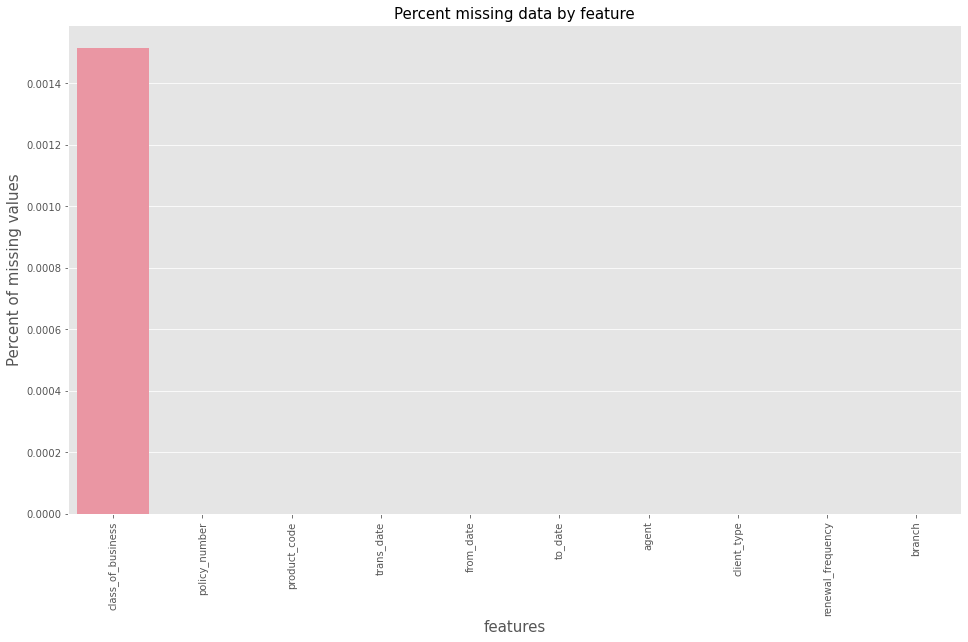

In [184]:
# Policies dataset
total = policies_df.isnull().sum().sort_values(ascending=False)
percent = (policies_df.isnull().sum()/policies_df.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(16, 9))
plt.xticks(rotation='90')
sns.barplot(x=missing.index, y=missing['Percent'])
plt.xlabel('features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing.head()

In [185]:
import numpy as np
train_df['policy_number'] = train_df['policy_number'].replace(np.nan, 0)

In [186]:
test_df['policy_number'] = test_df['policy_number'].replace(np.nan, 0)

In [187]:
policies_df['class_of_business'] = policies_df['class_of_business'].replace(np.nan, 0)

In [188]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9376 entries, 0 to 9375
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   claim_id           9376 non-null   object 
 1   policy_number      9376 non-null   object 
 2   claim_number       9376 non-null   object 
 3   sum_insured        9376 non-null   float64
 4   product            9376 non-null   object 
 5   agent              9376 non-null   object 
 6   class_of_business  9376 non-null   object 
 7   risk_type          9376 non-null   object 
 8   loss_date          9376 non-null   object 
 9   client_type        9376 non-null   object 
 10  renewal_frequency  9376 non-null   object 
 11  primary_cause      9376 non-null   object 
 12  secondary_cause    9376 non-null   object 
 13  branch             9376 non-null   object 
 14  target             9376 non-null   float64
dtypes: float64(2), object(13)
memory usage: 1.1+ MB


In [189]:
train_df.describe().T.style.background_gradient(cmap = "spring_r")

,count,mean,std,min,25%,50%,75%,max
sum_insured,9376.000000,8534789.617229,112556487.289963,0.000000,6500.000000,50542.000000,420000.000000,5211867675.000000
target,9376.000000,41464.711250,208434.717550,0.000000,287.925000,1956.925000,12700.642500,7868590.620000


* From the above data we can see there is high sum insured in terms of mean

In [190]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4019 entries, 0 to 4018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   claim_id           4019 non-null   object 
 1   policy_number      4019 non-null   object 
 2   claim_number       4019 non-null   object 
 3   sum_insured        4019 non-null   float64
 4   product            4019 non-null   object 
 5   agent              4019 non-null   object 
 6   class_of_business  4019 non-null   object 
 7   risk_type          4019 non-null   object 
 8   loss_date          4019 non-null   object 
 9   client_type        4019 non-null   object 
 10  renewal_frequency  4019 non-null   object 
 11  primary_cause      4019 non-null   object 
 12  secondary_cause    4019 non-null   object 
 13  branch             4019 non-null   object 
dtypes: float64(1), object(13)
memory usage: 439.7+ KB


In [191]:
test_df.describe().T.style.background_gradient(cmap="spring")

,count,mean,std,min,25%,50%,75%,max
sum_insured,4019.000000,17881685.998918,296830977.865617,0.000000,7000.000000,54000.000000,475500.000000,14143190230.250000


In [192]:
policies_df.shape

(30371, 10)

In [193]:
policies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30371 entries, 0 to 30370
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   policy_number      30371 non-null  object
 1   product_code       30371 non-null  object
 2   trans_date         30371 non-null  object
 3   from_date          30371 non-null  object
 4   to_date            30371 non-null  object
 5   agent              30371 non-null  object
 6   class_of_business  30371 non-null  object
 7   client_type        30371 non-null  object
 8   renewal_frequency  30371 non-null  object
 9   branch             30371 non-null  object
dtypes: object(10)
memory usage: 2.3+ MB


In [194]:
policies_df.describe().T.style.background_gradient(cmap="spring_r")

,count,unique,top,freq
policy_number,30371,5217,pol000005951,174
product_code,30371,37,prod00005,9994
trans_date,30371,20836,2020-07-01 08:45:55.653,14
from_date,30371,1431,2018-02-01 00:00:00.000,1122
to_date,30371,1369,2019-01-31 00:00:00.000,1463
agent,30371,223,ag00226,4620
class_of_business,30371,38,cob00031,7755
client_type,30371,3,ct0001,16747
renewal_frequency,30371,5,rf0001,14184
branch,30371,11,br00002,13636


In [195]:
# Let us check for duplicates
train_df.duplicated().any(), test_df.duplicated().any(), policies_df.duplicated().any()

(False, False, False)

In [196]:
# We would also like to merge "train" and "policies" datasets
train = pd.merge(train_df, policies_df)
train

,claim_id,policy_number,claim_number,sum_insured,product,agent,class_of_business,risk_type,loss_date,client_type,renewal_frequency,primary_cause,secondary_cause,branch,target,product_code,trans_date,from_date,to_date
0,ID_SHWOLB04CA2O,pol000010764,claim0013134,7000.0,prod00005,ag00044,cob00009,rt00032,2019-04-21,ct0003,rf0002,pc0007,sc00004,br00009,1637.73,prod00005,2018-09-20 18:08:58.993,2018-09-20 00:00:00.000,2019-05-31 00:00:00.000
1,ID_TWDB1RP1CGO7,pol000009336,claim0010388,12600.0,prod00005,ag00226,cob00009,rt00032,2018-12-21,ct0003,rf0001,pc0007,sc00004,br00001,440.00,prod00005,2018-08-22 13:08:34.247,2018-08-22 00:00:00.000,2018-12-31 00:00:00.000
2,ID_5O1OQUH5JZOK,pol000007786,claim0007509,8000.0,prod00015,ag00226,cob00034,rt00023,2018-10-31,ct0001,rf0002,pc0007,sc00023,br00001,29367.09,prod00015,2017-10-13 12:56:18.010,2017-10-01 00:00:00.000,2018-09-30 00:00:00.000
3,ID_5O1OQUH5JZOK,pol000007786,claim0007509,8000.0,prod00015,ag00226,cob00034,rt00023,2018-10-31,ct0001,rf0002,pc0007,sc00023,br00001,29367.09,prod00015,2018-07-31 12:00:29.377,2018-07-19 00:00:00.000,2018-09-30 00:00:00.000
4,ID_5O1OQUH5JZOK,pol000007786,claim0007509,8000.0,prod00015,ag00226,cob00034,rt00023,2018-10-31,ct0001,rf0002,pc0007,sc00023,br00001,29367.09,prod00015,2018-10-10 16:36:14.747,2018-10-01 00:00:00.000,2019-09-30 00:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9809,ID_1P9HT5Z3GYVR,pol000008384,claim0009187,5500.0,prod00005,ag00226,cob00009,rt00032,2018-06-30,ct0003,rf0001,pc0007,sc00023,br00001,0.00,prod00005,2018-04-26 12:19:23.743,2018-05-01 00:00:00.000,2018-08-31 00:00:00.000
9810,ID_1P9HT5Z3GYVR,pol000008384,claim0009187,5500.0,prod00005,ag00226,cob00009,rt00032,2018-06-30,ct0003,rf0001,pc0007,sc00023,br00001,0.00,prod00005,2018-09-05 16:51:12.243,2018-09-01 00:00:00.000,2018-12-31 00:00:00.000
9811,ID_FNU530I4S0R0,pol000008537,claim0009389,5000.0,prod00005,ag00226,cob00009,rt00032,2018-08-25,ct0003,rf0001,pc0007,sc00021,br00001,2673.31,prod00005,2017-10-10 09:57:43.837,2017-10-12 00:00:00.000,2018-02-11 00:00:00.000
9812,ID_FNU530I4S0R0,pol000008537,claim0009389,5000.0,prod00005,ag00226,cob00009,rt00032,2018-08-25,ct0003,rf0001,pc0007,sc00021,br00001,2673.31,prod00005,2018-02-07 14:08:52.933,2018-02-12 00:00:00.000,2018-06-11 00:00:00.000


In [197]:
# Let's convert datetime variables to datetime objects
train.loss_date = pd.to_datetime(train.loss_date, errors='coerce')
test_df.loss_date = pd.to_datetime(train.loss_date, errors='coerce')

In [198]:
test_df.loss_date.describe() 

count                    4019
unique                    271
top       2021-04-15 00:00:00
freq                       54
first     2018-01-05 00:00:00
last      2021-10-01 00:00:00
Name: loss_date, dtype: object

In [199]:
# day
train['day'] = train.loss_date.dt.day

# month
train['month'] = train.loss_date.dt.month
 
# year
train['year'] = train.loss_date.dt.year

# Preview engineered date features
train[['loss_date', 'day', 'month', 'year']].head()

,loss_date,day,month,year
0,2019-04-21,21,4,2019
1,2018-12-21,21,12,2018
2,2018-10-31,31,10,2018
3,2018-10-31,31,10,2018
4,2018-10-31,31,10,2018


In [200]:
# day
test_df['day'] = train.loss_date.dt.day

# month
test_df['month'] = train.loss_date.dt.month
 
# year
test_df['year'] = train.loss_date.dt.year

# Preview engineered date features
test_df[['loss_date', 'day', 'month', 'year']].head()

,loss_date,day,month,year
0,2019-04-21,21,4,2019
1,2018-12-21,21,12,2018
2,2018-10-31,31,10,2018
3,2018-10-31,31,10,2018
4,2018-10-31,31,10,2018


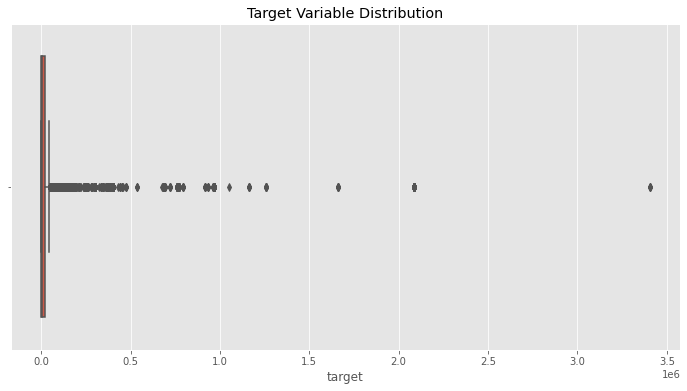

In [201]:
# Detecting Outliers
plt.figure(figsize=(12, 6))
sns.boxplot(train.target)
plt.title('Target Variable Distribution');

* Outliers are observations that are significantly different from other data points.
* Even the best machine learning algorithms will underperform if outliers are not cleaned from the data because outliers can adversely affect the training process of a machine learning algorithm, resulting in a loss of accuracy.

CC: PluralSight

In [202]:
train.target.describe()

count    9.814000e+03
mean     4.796507e+04
std      1.840206e+05
min      0.000000e+00
25%      3.000000e+02
50%      2.459080e+03
75%      1.891170e+04
max      3.404877e+06
Name: target, dtype: float64

In [203]:
train.target.value_counts()

0.00        1434
100.00        94
20000.00      62
900.00        41
300.00        36
            ... 
859.05         1
375.00         1
3120.20        1
943.00         1
5152.50        1
Name: target, Length: 1410, dtype: int64

In [204]:
# We will use Quantile Flooring and Capping
print(train.target.quantile(0.10))
print(train.target.quantile(0.90))

0.0
87878.75


* In this technique, we will do the flooring (e.g., the 10th percentile) for the lower values and capping (e.g., the 90th percentile) for the higher values. The lines of code below print the 10th and 90th percentiles of the variable 'Income', respectively. These values will be used for quantile-based flooring and capping.

In [205]:
# We'll then remove the outliers
train.target = np.where(train.target<0.0, 0.0, train.target)
train.target = np.where(train.target>87878.75, 87878.75, train.target)
# calculate the skewness
print(train.target.skew())

1.6414257468103608


In [206]:
# We then completely remove data points that are outliers
index = train[(train['target'] >= 5152.50)|(train['target'] <= 0.00)].index
train.drop(index, inplace=True)
train['target'].describe()

count    4409.000000
mean     1417.022068
std      1326.636789
min         1.950000
25%       325.900000
50%       924.000000
75%      2210.350000
max      5143.750000
Name: target, dtype: float64

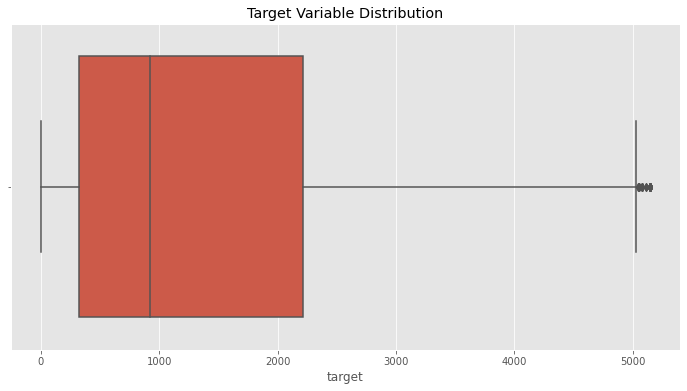

In [207]:
# Now let us look at our data after outlier treatment
plt.figure(figsize=(12, 6))
sns.boxplot(train.target)
plt.title('Target Variable Distribution');

# EDA

In [208]:
pd.set_option('display.max_columns', None)#In large datasets with many columns, it makes all columns appear in the console.
train.head()

,claim_id,policy_number,claim_number,sum_insured,product,agent,class_of_business,risk_type,loss_date,client_type,renewal_frequency,primary_cause,secondary_cause,branch,target,product_code,trans_date,from_date,to_date,day,month,year
0,ID_SHWOLB04CA2O,pol000010764,claim0013134,7000.0,prod00005,ag00044,cob00009,rt00032,2019-04-21,ct0003,rf0002,pc0007,sc00004,br00009,1637.73,prod00005,2018-09-20 18:08:58.993,2018-09-20 00:00:00.000,2019-05-31 00:00:00.000,21,4,2019
1,ID_TWDB1RP1CGO7,pol000009336,claim0010388,12600.0,prod00005,ag00226,cob00009,rt00032,2018-12-21,ct0003,rf0001,pc0007,sc00004,br00001,440.00,prod00005,2018-08-22 13:08:34.247,2018-08-22 00:00:00.000,2018-12-31 00:00:00.000,21,12,2018
40,ID_UP3JV78NJ23V,pol000007786,claim0007397,337500.0,prod00015,ag00226,cob00034,rt00023,2019-12-12,ct0001,rf0002,pc0002,sc00045,br00001,2435.29,prod00015,2017-10-13 12:56:18.010,2017-10-01 00:00:00.000,2018-09-30 00:00:00.000,12,12,2019
41,ID_UP3JV78NJ23V,pol000007786,claim0007397,337500.0,prod00015,ag00226,cob00034,rt00023,2019-12-12,ct0001,rf0002,pc0002,sc00045,br00001,2435.29,prod00015,2018-07-31 12:00:29.377,2018-07-19 00:00:00.000,2018-09-30 00:00:00.000,12,12,2019
42,ID_UP3JV78NJ23V,pol000007786,claim0007397,337500.0,prod00015,ag00226,cob00034,rt00023,2019-12-12,ct0001,rf0002,pc0002,sc00045,br00001,2435.29,prod00015,2018-10-10 16:36:14.747,2018-10-01 00:00:00.000,2019-09-30 00:00:00.000,12,12,2019


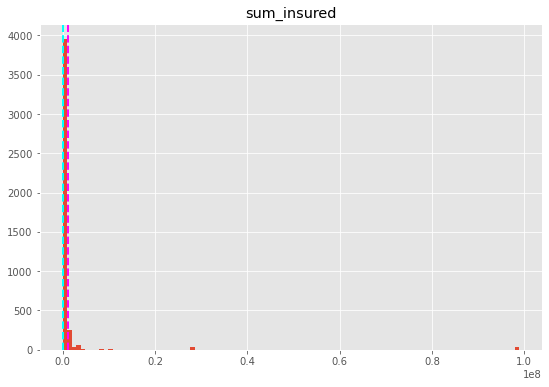

In [209]:
# Plot a histogram for each numeric feature
num_features = ["sum_insured"]
for col in num_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca() # Get the current axes
    feature = train[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

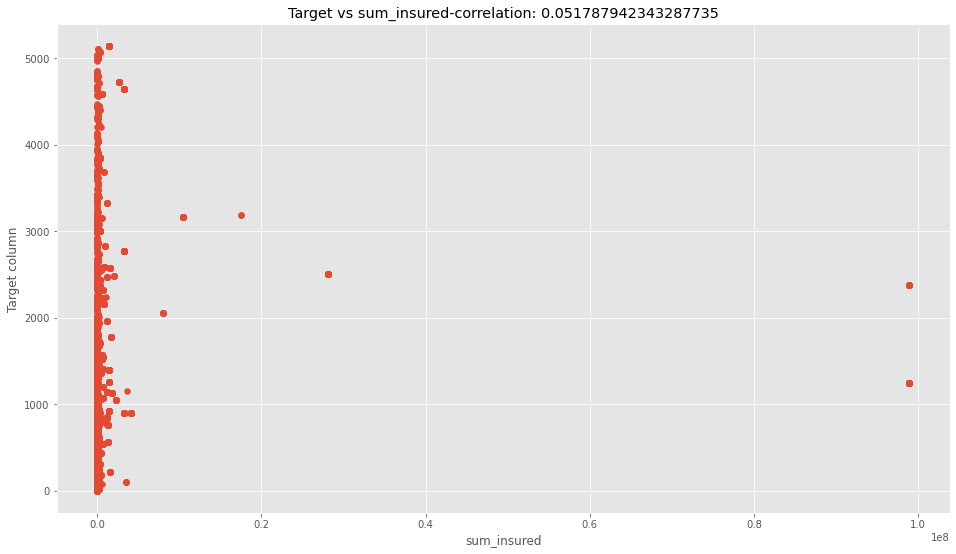

In [210]:
for col in num_features:
    fig = plt.figure(figsize=(16,9))
    ax = fig.gca()
    feature = train[col]
    label = train["target"]
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel("Target column")
    ax.set_title("Target vs " + col + "-correlation: "+str(correlation))
plt.show()

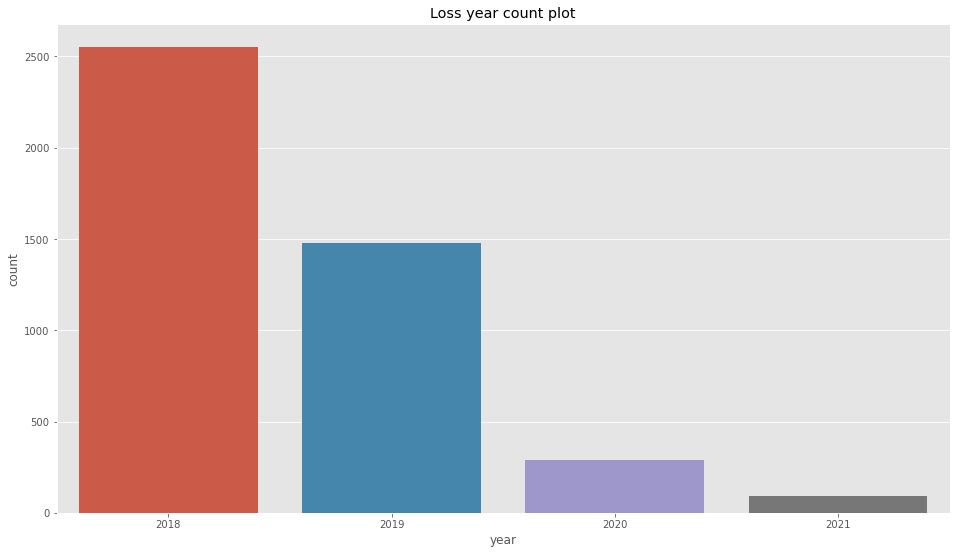

In [211]:
# Loss year countplot
plt.figure(figsize = (16, 9))
sns.countplot(x = 'year', data = train)
plt.title('Loss year count plot')
plt.show()

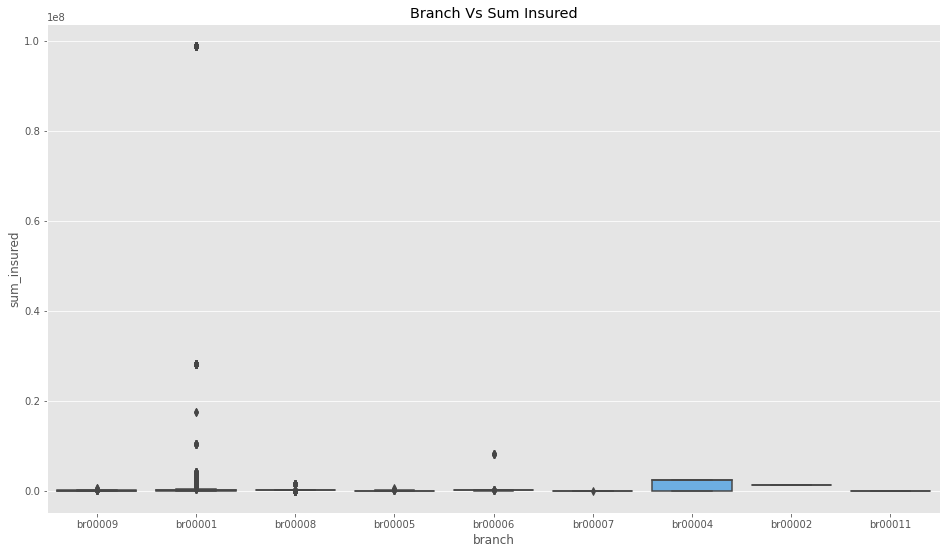

In [212]:
plt.figure(figsize = (16, 9))
sns.boxplot(x = 'branch', y = 'sum_insured', data = train)
plt.title('Branch Vs Sum Insured')
plt.show()

In [213]:
# We'll deal with the outliers
print(train.sum_insured.quantile(0.10))
print(train.sum_insured.quantile(0.90))

0.0
1150000.0


In [214]:
train.sum_insured.value_counts()

0.0         642
100000.0    588
25000.0     283
50000.0     260
15000.0     207
           ... 
152900.0      1
14850.0       1
5200.0        1
12600.0       1
26400.0       1
Name: sum_insured, Length: 157, dtype: int64

In [215]:
train.sum_insured = np.where(train.sum_insured<0.0, 0.0, train.sum_insured)
train.sum_insured = np.where(train.sum_insured>1150000.0, 1150000.0, train.sum_insured)
# calculate the skewness
print(train.sum_insured.skew())

2.0765668184122505


In [216]:
index = train[(train['sum_insured'] >= 7500.0)|(train['sum_insured'] <= 200.0)].index
train.drop(index, inplace=True)
train['sum_insured'].describe()

count     609.000000
mean     5381.346470
std      1345.871304
min       350.000000
25%      5000.000000
50%      5500.000000
75%      6000.000000
max      7000.000000
Name: sum_insured, dtype: float64

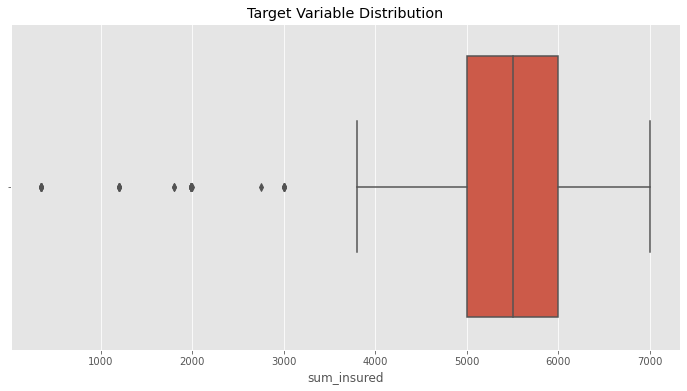

In [217]:
# Now let us look at our data after outlier treatment
plt.figure(figsize=(12, 6))
sns.boxplot(train.sum_insured)
plt.title('Target Variable Distribution');

# Training a Regression Model

In [218]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 609 entries, 0 to 9812
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   claim_id           609 non-null    object        
 1   policy_number      609 non-null    object        
 2   claim_number       609 non-null    object        
 3   sum_insured        609 non-null    float64       
 4   product            609 non-null    object        
 5   agent              609 non-null    object        
 6   class_of_business  609 non-null    object        
 7   risk_type          609 non-null    object        
 8   loss_date          609 non-null    datetime64[ns]
 9   client_type        609 non-null    object        
 10  renewal_frequency  609 non-null    object        
 11  primary_cause      609 non-null    object        
 12  secondary_cause    609 non-null    object        
 13  branch             609 non-null    object        
 14  target   

In [219]:
train.isna().sum()

claim_id             0
policy_number        0
claim_number         0
sum_insured          0
product              0
agent                0
class_of_business    0
risk_type            0
loss_date            0
client_type          0
renewal_frequency    0
primary_cause        0
secondary_cause      0
branch               0
target               0
product_code         0
trans_date           0
from_date            0
to_date              0
day                  0
month                0
year                 0
dtype: int64

In [220]:
# Convert categorical variables to categorical objects
cat_cols = train.columns.difference(['claim_id', 'loss_date', 'sum_insured', 'product_code', 'target', 'from_date', 'to_date', 'trans_date', 'year']).tolist()

# Preview categorical variables
train[cat_cols].head()

,agent,branch,claim_number,class_of_business,client_type,day,month,policy_number,primary_cause,product,renewal_frequency,risk_type,secondary_cause
0,ag00044,br00009,claim0013134,cob00009,ct0003,21,4,pol000010764,pc0007,prod00005,rf0002,rt00032,sc00004
515,ag00044,br00009,claim0013104,cob00009,ct0003,29,1,pol000010746,pc0002,prod00005,rf0002,rt00032,sc00053
516,ag00044,br00009,claim0013103,cob00009,ct0003,3,10,pol000010746,pc0007,prod00005,rf0002,rt00032,sc00023
541,ag00044,br00009,claim0013169,cob00009,ct0003,13,11,pol000010710,pc0007,prod00005,rf0002,rt00032,sc00023
542,ag00044,br00009,claim0014019,cob00009,ct0003,25,6,pol000010710,pc0007,prod00005,rf0002,rt00032,sc00023


In [221]:
# Convert
for col in cat_cols:
  train[col] = train[col].astype('category')

In [222]:
from sklearn.preprocessing import LabelEncoder

# Label encode categorical variables
for col in cat_cols:
  # Instantiate Labelencoder
  le = LabelEncoder()
  train[col] = le.fit_transform(train[col])

# Preview engineered train dataset
train.head()

,claim_id,policy_number,claim_number,sum_insured,product,agent,class_of_business,risk_type,loss_date,client_type,renewal_frequency,primary_cause,secondary_cause,branch,target,product_code,trans_date,from_date,to_date,day,month,year
0,ID_SHWOLB04CA2O,220,243,7000.0,0,0,0,6,2019-04-21,1,1,2,1,6,1637.73,prod00005,2018-09-20 18:08:58.993,2018-09-20 00:00:00.000,2019-05-31 00:00:00.000,20,3,2019
515,ID_GMJUKJ2S31ZD,216,239,6000.0,0,0,0,6,2019-01-29,1,1,0,13,6,4010.00,prod00005,2018-07-10 08:45:39.803,2018-07-09 00:00:00.000,2019-07-08 00:00:00.000,28,0,2019
516,ID_L6LZ2ONE6QA6,216,238,6000.0,0,0,0,6,2018-10-03,1,1,2,5,6,581.48,prod00005,2018-07-10 08:45:39.803,2018-07-09 00:00:00.000,2019-07-08 00:00:00.000,2,9,2018
541,ID_ITP8QT0M907I,204,246,4500.0,0,0,0,6,2018-11-13,1,1,2,5,6,1507.00,prod00005,2018-02-22 10:17:42.610,2018-02-20 00:00:00.000,2019-02-19 00:00:00.000,12,10,2018
542,ID_2LT0OZQ7V8ZU,204,268,4500.0,0,0,0,6,2018-06-25,1,1,2,5,6,769.49,prod00005,2018-02-22 10:17:42.610,2018-02-20 00:00:00.000,2019-02-19 00:00:00.000,24,5,2018


In [223]:
train[cat_cols].head()

,agent,branch,claim_number,class_of_business,client_type,day,month,policy_number,primary_cause,product,renewal_frequency,risk_type,secondary_cause
0,0,6,243,0,1,20,3,220,2,0,1,6,1
515,0,6,239,0,1,28,0,216,0,0,1,6,13
516,0,6,238,0,1,2,9,216,2,0,1,6,5
541,0,6,246,0,1,12,10,204,2,0,1,6,5
542,0,6,268,0,1,24,5,204,2,0,1,6,5


In [224]:
# Convert
for col in cat_cols:
  test_df[col] = test_df[col].astype('str')

In [225]:
test_df.head()

,claim_id,policy_number,claim_number,sum_insured,product,agent,class_of_business,risk_type,loss_date,client_type,renewal_frequency,primary_cause,secondary_cause,branch,day,month,year
0,ID_4RO0KZI9BBW2,pol000007115,claim0005757,300000.0,prod00005,ag00068,cob00009,rt00032,2019-04-21,ct0003,rf0001,pc0007,sc00029,br00004,21,4,2019
1,ID_GTE9ZUJ9GZ97,pol000006008,claim0003037,2700000.0,prod00015,ag00064,cob00034,rt00023,2018-12-21,ct0001,rf0003,pc0007,sc00022,br00002,21,12,2018
2,ID_RUVIYRKWZ4RG,pol000007651,claim0006507,4071352.0,prod00012,ag00021,cob00016,rt00015,2018-10-31,ct0001,rf0001,pc0011,sc00049,br00001,31,10,2018
3,ID_J81X8SWU6JYN,pol000010981,claim0013636,0.0,prod00002,ag00037,cob00002,rt00002,2018-10-31,ct0001,rf0002,pc0002,sc00012,br00005,31,10,2018
4,ID_94NM3JJAWWOQ,pol000005926,claim0001750,1607178.0,prod00015,ag00037,cob00034,rt00023,2018-10-31,ct0001,rf0003,pc0007,sc00022,br00002,31,10,2018


In [226]:
# Label encode categorical variables
for col in cat_cols:
  # Instantiate Labelencoder
  le = LabelEncoder()
  test_df[col] = le.fit_transform(test_df[col])

# Preview engineered test dataset
test_df.head()

,claim_id,policy_number,claim_number,sum_insured,product,agent,class_of_business,risk_type,loss_date,client_type,renewal_frequency,primary_cause,secondary_cause,branch,day,month,year
0,ID_4RO0KZI9BBW2,740,1667,300000.0,4,4,8,29,2019-04-21,2,0,6,26,3,13,6,2019
1,ID_GTE9ZUJ9GZ97,313,883,2700000.0,12,3,28,20,2018-12-21,0,2,6,20,1,13,3,2018
2,ID_RUVIYRKWZ4RG,918,1895,4071352.0,10,0,14,14,2018-10-31,0,0,9,43,0,24,1,2018
3,ID_J81X8SWU6JYN,2082,3852,0.0,1,1,1,1,2018-10-31,0,1,1,10,4,24,1,2018
4,ID_94NM3JJAWWOQ,258,507,1607178.0,12,1,28,20,2018-10-31,0,2,6,20,1,24,1,2018


In [227]:
train.drop(["trans_date", "to_date", "from_date"], 1, inplace=True)
train.head()

,claim_id,policy_number,claim_number,sum_insured,product,agent,class_of_business,risk_type,loss_date,client_type,renewal_frequency,primary_cause,secondary_cause,branch,target,product_code,day,month,year
0,ID_SHWOLB04CA2O,220,243,7000.0,0,0,0,6,2019-04-21,1,1,2,1,6,1637.73,prod00005,20,3,2019
515,ID_GMJUKJ2S31ZD,216,239,6000.0,0,0,0,6,2019-01-29,1,1,0,13,6,4010.00,prod00005,28,0,2019
516,ID_L6LZ2ONE6QA6,216,238,6000.0,0,0,0,6,2018-10-03,1,1,2,5,6,581.48,prod00005,2,9,2018
541,ID_ITP8QT0M907I,204,246,4500.0,0,0,0,6,2018-11-13,1,1,2,5,6,1507.00,prod00005,12,10,2018
542,ID_2LT0OZQ7V8ZU,204,268,4500.0,0,0,0,6,2018-06-25,1,1,2,5,6,769.49,prod00005,24,5,2018


# Model

In [228]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Select main columns to be used in training
main_cols = train.columns.difference(['claim_id', 'loss_date', 'product_code', 'target']).tolist()
X = train[main_cols]
y = train.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Check the MAE score of the model
print(f'LinearRegression MAE score on the X_test is: {mean_absolute_error(y_test, y_pred)}')

LinearRegression MAE score on the X_test is: 834.0055705701222


* The Mean absolute error represents the average of the absolute difference between the actual and predicted values in the dataset. 
It measures the average of the residuals in the dataset.

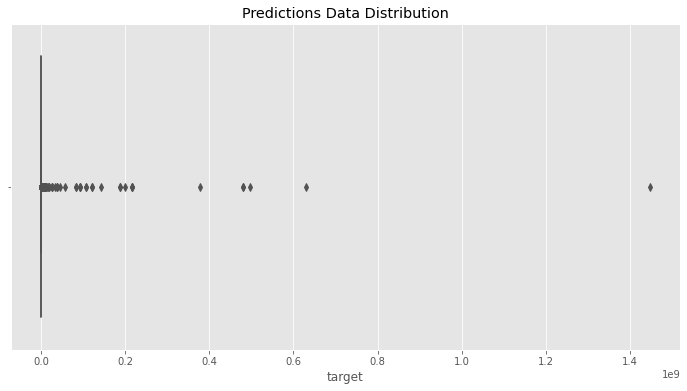

In [229]:
test = test_df[main_cols]
predictions = model.predict(test)

# # Create a submission file
sub_file = sample_df.copy()
sub_file.target = predictions

# Check the distribution of your predictions
plt.figure(figsize=(12, 6))
sns.boxplot(sub_file.target)
plt.title('Predictions Data Distribution');

ValueError: x and y must be the same size

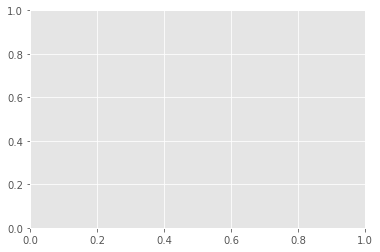

In [230]:

plt.scatter(y_test, predictions)
plt.xlabel("Actual labels")
plt.ylabel("Predicted labels")
plt.title("Daily Bike Share Predictions")
# Overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color="magenta")
plt.show()

In [233]:
print('size of x = {0}'.format(X.size))
print('size of y = {0}'.format(y.size))
assert X.size == y.size

size of x = 9135
size of y = 609


AssertionError: 

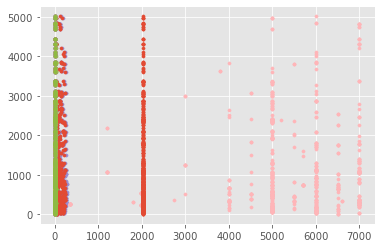

In [234]:
for col in X.columns:
   plt.scatter(X[col], y, s=10)

In [235]:
X_train.shape

(426, 15)

In [236]:
y_train.shape

(426,)

In [238]:
X_test.shape

(183, 15)

In [239]:
y_test.shape

(183,)

In [244]:
#Visualization of the training set results
plt.scatter(X_train[:0], y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'green')
plt.title('salary vs yearExp (Training set)')
plt.xlabel('years of experience')
plt.ylabel('salary')
plt.show()

SyntaxError: invalid syntax (Temp/ipykernel_11972/1816820865.py, line 2)